In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model, neighbors
)

In [68]:
# creating the synthetic dataset
N = 20
features = np.linspace(-10, 10, num=N)
targets = 2*features ** 2 - 3 + np.random.uniform(-2, 2, N)
(train_ftrs, train_trgt, test_ftrs, test_trgt) = skms.train_test_split(features, targets, test_size=N//2)
train_ftrs, train_trgt, test_ftrs, test_trgt

(array([  4.73684211,   3.68421053,  -6.84210526,  -8.94736842,
          7.89473684,  -1.57894737,   8.94736842,   6.84210526,
        -10.        ,   2.63157895]),
 array([10.        ,  0.52631579, -0.52631579,  5.78947368, -3.68421053,
        -4.73684211, -7.89473684, -5.78947368, -2.63157895,  1.57894737]),
 array([ 40.20010561,  25.24687693,  91.56735842, 158.69687817,
        122.96992414,   1.49768408, 158.62688117,  92.20791769,
        197.66602286,  10.68993335]),
 array([195.77522044,  -2.75618122,  -1.10678631,  63.07499265,
         23.93740917,  40.03664256, 123.12248731,  64.02512802,
         10.53793208,   0.24877925]))

In [75]:
# displaying the dataframe based on the above training features and targets.
display(pd.DataFrame(
    {
        "features": train_ftrs,
        "targets": train_trgt
    }
).T)

,0,1,2,3,4,5,6,7,8,9
features,4.736842,3.684211,-6.842105,-8.947368,7.894737,-1.578947,8.947368,6.842105,-10.000000,2.631579
targets,10.000000,0.526316,-0.526316,5.789474,-3.684211,-4.736842,-7.894737,-5.789474,-2.631579,1.578947


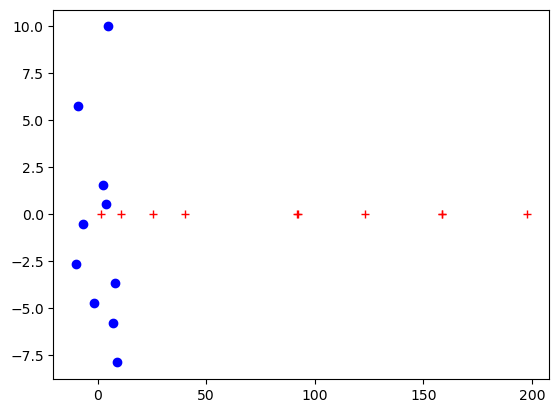

In [70]:
# plotting the dataset
plt.plot(train_ftrs, train_trgt, "bo")
plt.plot(test_ftrs, np.zeros_like(test_ftrs), "r+")
# training set is in blue dots.
# the red pluses show the input feature values for the test set.

In [74]:
skmodel = linear_model.LinearRegression()
fit = skmodel.fit(train_ftrs.reshape(-1, 1), train_trgt)
predictions = skmodel.predict(test_ftrs.reshape(-1, 1))
predictions[:3]

array([ -8.94397368,  -5.83416713, -19.62676484])